# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 6: Metropolis - 1D Ising Model</span>

$\textbf{Introduction}$

In lecture 5 we introduced the Metropolis algorithm to sample the probability distribution function of hydrogen atomic orbitals $1s$ and $2p_z$, where the main utility of Metropolis was to sample a distribution $\rho : \mathbb{R}^3 \rightarrow \mathbb{R}$. Generally, another huge gain in using Metropolis algorithm is that it samples probability distribution functions by computing a ratio, and this may cancel part of functions (for example the normalization) we are not able to write explicitly.

In statistical physics the probability distribution function for energy is given by the Boltzmann function:

$$P(E)=\frac{e^{-\beta E}}{Z}$$

where Z is the partition function of the system, which is not always exactly computable. It's clear that, in a Metropolis sampling of this probability distribution, we will have $P(E')/P(E) = e^{-\beta (E'-E)}$, where the partition function has vanished.  
Actually, this exercise is the simulation of a 1D Ising Model, which is an exactly resoluble system (thus in principle one can compute the partition function), via Metropolis algorithm using Boltzmann function; we will use the theoretical results to verify if the results obtained with the simulation are correct.

$\textbf{1D Ising Model}$

1D Ising model describes the properties of a linear system of N spins with nearest neighbors interaction; the hamiltonian of such a system is given by:

$$H = -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with periodic boundary conditions $s_{N+1} = s_{1}$.  
In this exercise we were asked to improve an already given Monte Carlo code which simulates a 1D Ising model and computes the internal energy $U(N,T) = \langle H \rangle$ of the system by adding the calculation of:
- heat capacity: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
- magnetic susceptibility: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
- magnetization: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

and computing them varying the temperature of the sistem in $[0.5,2]$ using Metropolis algorithm and Gibbs sampling.

$\textbf{Gibbs Sampling}$

Gibbs sampling method is an alternative to Metropolis algorithm (it's like a Metropolis sampling which always accepts the proposed move); in the Ising model it works by picking randomly a spin and always replacing its value with probability:

$$P(s'_k= +1 \,|\,s_j, j \neq k) = \frac{1}{1+e^{- 2 \beta (J \sum_{i(n.n.to k.}s_i + h)}}\;\;\;;\;\;\; P(s'_k= -1) = 1-P(s'_k= +1)$$

$\textbf{Code}$

I've implemented all the requested variables caluclation (average values and statistical uncertainties) with both sampling methods and I've written the following python script which runs the program four times (one for Metropolis algorithm and external field = 0, the analogous for Gibbs sampling, one for Metropolis algorithm and external field = 0.02 and the analogous for Gibbs sampling) for 100 values of temperature between 0.5 and 2.0. Once this script has been executed the data will be produced, and the cell below will produce graphs of the four observables (with both sampling methods for each variable in the same graph) compared to the theoretical values.  
N.B. I've set 50 blocks of 2000 steps each ($10^5$ total MC steps), but this variables can be modified in the input file

In [4]:
import subprocess
import numpy as np

f = open("input.dat", "r+")
lines = f.readlines()
f.close()
dim=100
temp=np.zeros(dim)
for j in range (0,dim):
    temp[j] = 0.5 + 1.5*j/(dim-1)
    
k=0
metro_ene = np.zeros(dim)
metro_heat = np.zeros(dim)
metro_mag = np.zeros(dim)
metro_chi = np.zeros(dim)
metro_error_ene = np.zeros(dim)
metro_error_heat = np.zeros(dim)
metro_error_mag = np.zeros(dim)
metro_error_chi = np.zeros(dim)
gibbs_ene = np.zeros(dim)
gibbs_heat = np.zeros(dim)
gibbs_mag = np.zeros(dim)
gibbs_chi = np.zeros(dim)
gibbs_error_ene = np.zeros(dim)
gibbs_error_heat = np.zeros(dim)
gibbs_error_mag = np.zeros(dim)
gibbs_error_chi = np.zeros(dim)

lines[3] = (str)(0.0) + "\n" #external field h=0.0
lines[4] = (str)(1) + "\n" #metropolis
for t in temp:
    lines[0] = (str)(t) + "\n"
    f = open("input.dat", "w+")
    for line in lines:
        f.write(line)
    f.close()
    cmd = "rm *.txt"
    returned_value = subprocess.call(cmd, shell=True)
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)
    metro_ene[k], metro_error_ene[k] = np.loadtxt("output_ene.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    metro_heat[k], metro_error_heat[k] = np.loadtxt("output_heat.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    metro_chi[k], metro_error_chi[k] = np.loadtxt("output_chi.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    k+=1

k=0
lines[4] = (str)(0) + "\n" #Gibbs
for t in temp:
    lines[0] = (str)(t) + "\n"
    f = open("input.dat", "w+")
    for line in lines:
        f.write(line)
    f.close()
    cmd = "rm *.txt"
    returned_value = subprocess.call(cmd, shell=True)
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)
    gibbs_ene[k], gibbs_error_ene[k] = np.loadtxt("output_ene.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    gibbs_heat[k], gibbs_error_heat[k] = np.loadtxt("output_heat.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    gibbs_chi[k], gibbs_error_chi[k] = np.loadtxt("output_chi.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    k+=1
    
k=0
lines[3] = (str)(0.02) + "\n" #external field h = 0.02
lines[4] = (str)(1) + "\n" #metropolis
for t in temp:
    lines[0] = (str)(t) + "\n"
    f = open("input.dat", "w+")
    for line in lines:
        f.write(line)
    f.close()
    cmd = "rm output_mag.txt"
    returned_value = subprocess.call(cmd, shell=True)
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)
    metro_mag[k], metro_error_mag[k] = np.loadtxt("output_mag.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    k+=1

k=0
lines[4] = (str)(0) + "\n" #Gibbs
for t in temp:
    lines[0] = (str)(t) + "\n"
    f = open("input.dat", "w+")
    for line in lines:
        f.write(line)
    f.close()
    cmd = "rm output_mag.txt"
    returned_value = subprocess.call(cmd, shell=True)
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)
    gibbs_mag[k], gibbs_error_mag[k] = np.loadtxt("output_mag.txt", skiprows=((int)(lines[5])-1), usecols=(1,2), unpack=True)
    k+=1

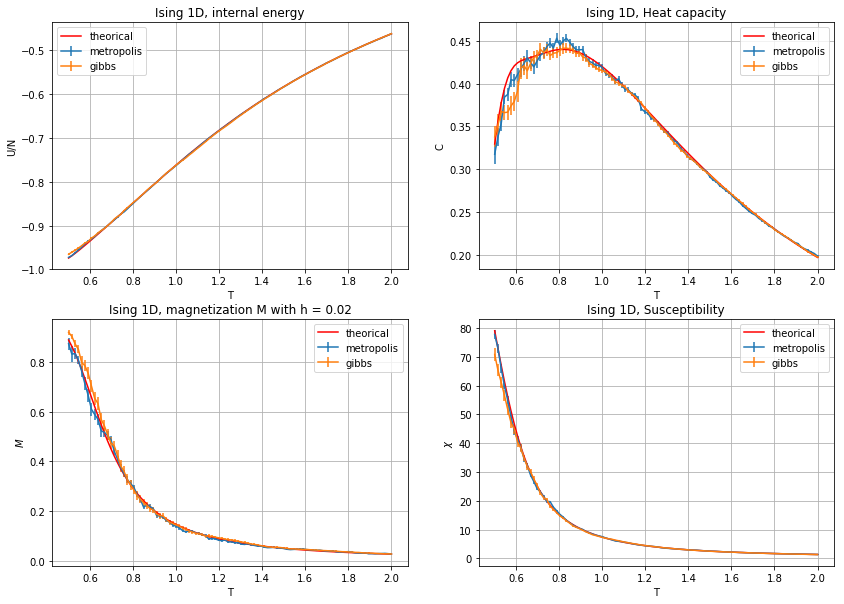

In [5]:
import matplotlib
import matplotlib.pyplot as plt


#internal energy per spin
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
plt.errorbar(temp, metro_ene, yerr=metro_error_ene, label='metropolis')
plt.errorbar(temp, gibbs_ene, yerr=gibbs_error_ene, label='gibbs')
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, color='r', label='theorical')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)

#heat capacity per spin
plt.subplot(2,2,2)
plt.errorbar(temp, metro_heat, yerr=metro_error_heat, label='metropolis')
plt.errorbar(temp, gibbs_heat, yerr=gibbs_error_heat, label='gibbs')
heat_theo=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat_theo, color='r', label='theorical')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)

#magnetization
plt.subplot(2,2,3)
plt.errorbar(temp, metro_mag, yerr=metro_error_mag, label='metropolis')
plt.errorbar(temp, gibbs_mag, yerr=gibbs_error_mag, label='gibbs')
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, color='r', label='theorical')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)

#magnetic susceptibility
plt.subplot(2,2,4)
plt.errorbar(temp, metro_chi, yerr=metro_error_chi, label='metropolis')
plt.errorbar(temp, gibbs_chi, yerr=gibbs_error_chi, label='gibbs')
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, color='r', label='theorical')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)


plt.show()

The graphs show perfect agreement between the two sampling methods and with the theoretical values.